In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ls

1533148642_test.csv
1533148642_train.csv
HackDay2.ipynb
My_Prediction.csv
README.md
data_description.txt*
house-prices-advanced-regression-techniques/
house-prices-advanced-regression-techniques.zip
sample_submission.csv*


In [3]:
df_test = pd.read_csv("1533148642_test.csv")

In [4]:
df_test.shape

(1459, 80)

In [5]:
df_train = pd.read_csv("1533148642_train.csv")

In [6]:
df_train.shape

(1460, 81)

In [7]:
Trainingdatasize = df_test.shape[0]

In [8]:
Trainingdatasize

1459

In [9]:
df = df_test.append(df_train)

In [10]:
df[df.duplicated() ==  True]

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold


In [11]:
df.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,NaN,2,1Fam,TA,No,468.0,144.0,...,WD,120,Pave,5,882.0,AllPub,140,1961,1961,2010
1,1329,0,0,NaN,3,1Fam,TA,No,923.0,0.0,...,WD,0,Pave,6,1329.0,AllPub,393,1958,1958,2010
2,928,701,0,NaN,3,1Fam,TA,No,791.0,0.0,...,WD,0,Pave,6,928.0,AllPub,212,1997,1998,2010
3,926,678,0,NaN,3,1Fam,TA,No,602.0,0.0,...,WD,0,Pave,7,926.0,AllPub,360,1998,1998,2010
4,1280,0,0,NaN,2,TwnhsE,TA,No,263.0,0.0,...,WD,144,Pave,5,1280.0,AllPub,0,1992,1992,2010


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 81 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            198 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2837 non-null object
BsmtExposure     2837 non-null object
BsmtFinSF1       2918 non-null float64
BsmtFinSF2       2918 non-null float64
BsmtFinType1     2840 non-null object
BsmtFinType2     2839 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2838 non-null object
BsmtUnfSF        2918 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2918 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      291

In [13]:
df.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
count,2919.000000,2919.000000,2919.000000,2919.000000,2918.000000,2918.000000,2917.000000,2917.000000,2918.000000,2919.000000,...,2919.000000,2919.000000,1460.000000,2919.000000,2919.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,1159.581706,336.483727,2.602261,2.860226,441.423235,49.582248,0.429894,0.061364,560.772104,23.098321,...,6.089072,2.251799,180921.195890,16.062350,6.451524,1051.777587,93.709832,1971.312778,1984.264474,2007.792737
std,392.362079,428.701456,25.188169,0.822693,455.610826,169.205611,0.524736,0.245687,439.543659,64.244246,...,1.409947,35.663946,79442.502883,56.184365,1.569379,440.766258,126.526589,30.291442,20.894344,1.314964
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,34900.000000,0.000000,2.000000,0.000000,0.000000,1872.000000,1950.000000,2006.000000
25%,876.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,220.000000,0.000000,...,5.000000,0.000000,129975.000000,0.000000,5.000000,793.000000,0.000000,1953.500000,1965.000000,2007.000000
50%,1082.000000,0.000000,0.000000,3.000000,368.500000,0.000000,0.000000,0.000000,467.000000,0.000000,...,6.000000,0.000000,163000.000000,0.000000,6.000000,989.500000,0.000000,1973.000000,1993.000000,2008.000000
75%,1387.500000,704.000000,0.000000,3.000000,733.000000,0.000000,1.000000,0.000000,805.500000,0.000000,...,7.000000,0.000000,214000.000000,0.000000,7.000000,1302.000000,168.000000,2001.000000,2004.000000,2009.000000
max,5095.000000,2065.000000,508.000000,8.000000,5644.000000,1526.000000,3.000000,2.000000,2336.000000,1012.000000,...,10.000000,800.000000,755000.000000,576.000000,15.000000,6110.000000,1424.000000,2010.000000,2010.000000,2010.000000


In [14]:
df['Id'].value_counts()

2047    1
1088    1
1084    1
1082    1
1080    1
       ..
2532    1
483     1
2530    1
481     1
2049    1
Name: Id, Length: 2919, dtype: int64

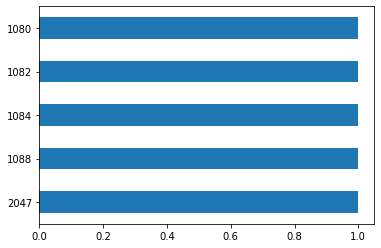

In [15]:
df['Id'].value_counts().head().plot(kind='barh')

In [16]:
abs(df.corr()['SalePrice'].sort_values(ascending = False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
Name: SalePr

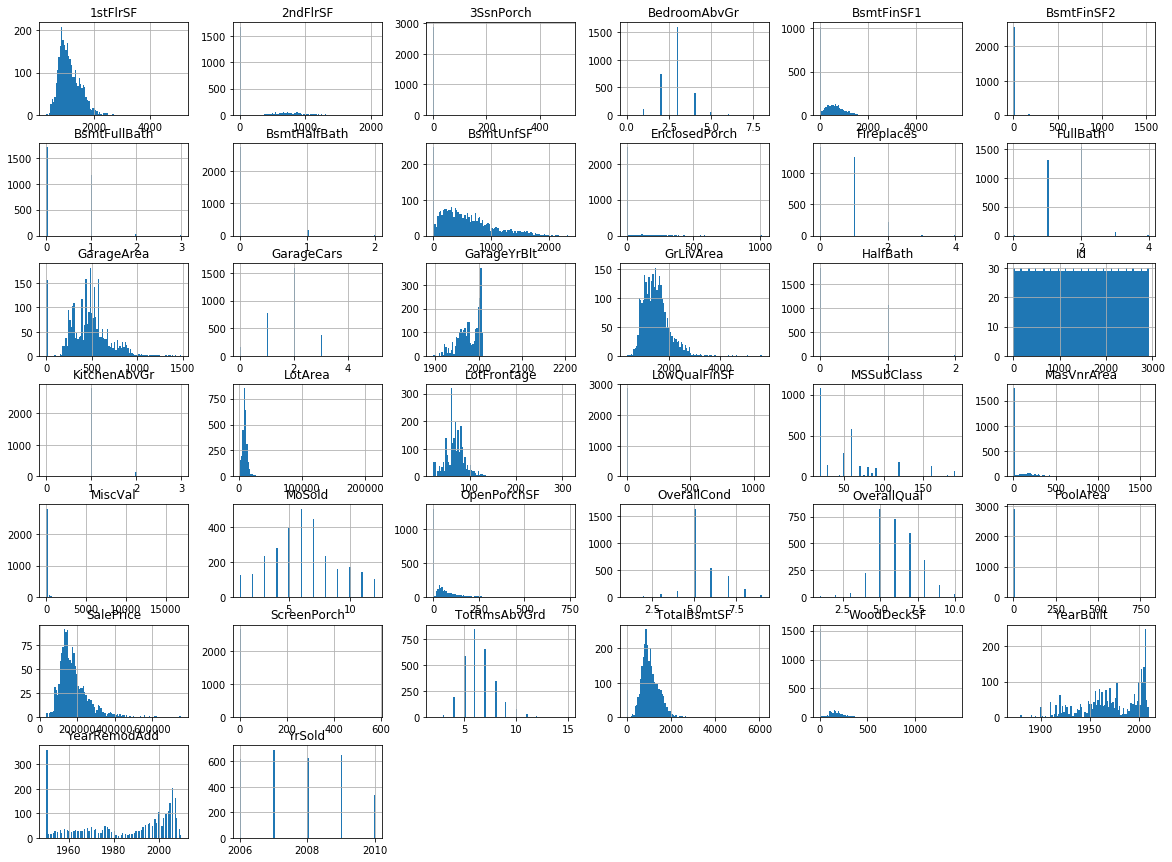

In [17]:
%matplotlib inline
df.hist(bins=100, figsize=(20,15))
plt.show()

In [58]:
[elem for elem in df['LotArea'] if elem >100000] 

[159000, 215245, 164660, 115149]

In [18]:
df1 = df.select_dtypes(exclude=['object'])
df2 = df.select_dtypes(include=['object'])

In [19]:
df1.duplicated().sum()

0

In [20]:
df1.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          1
BsmtFinSF2          1
BsmtFullBath        2
BsmtHalfBath        2
BsmtUnfSF           1
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          1
GarageCars          1
GarageYrBlt       159
GrLivArea           0
HalfBath            0
Id                  0
KitchenAbvGr        0
LotArea             0
LotFrontage       486
LowQualFinSF        0
MSSubClass          0
MasVnrArea         23
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
SalePrice        1459
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         1
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
dtype: int64

In [21]:
df1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,5,0,NaN,120,5,882.0,140,1961,1961,2010
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,6,0,NaN,0,6,1329.0,393,1958,1958,2010
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,5,0,NaN,0,6,928.0,212,1997,1998,2010
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,6,0,NaN,0,7,926.0,360,1998,1998,2010
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,8,0,NaN,144,5,1280.0,0,1992,1992,2010


In [22]:
df1['LotFrontage'] = df1['LotFrontage'].fillna(df1['LotFrontage'].median())
df1['GarageYrBlt'] = df1['GarageYrBlt'].fillna(df1['GarageYrBlt'].median())
df1['MasVnrArea'] = df1['MasVnrArea'].fillna(df1['MasVnrArea'].median())
df1['BsmtFinSF1'] = df1['BsmtFinSF1'].fillna(df1['BsmtFinSF1'].median())
df1['BsmtFinSF2'] = df1['BsmtFinSF2'].fillna(df1['BsmtFinSF2'].median())
df1['BsmtFullBath'] = df1['BsmtFullBath'].fillna(df1['BsmtFullBath'].median())
df1['BsmtHalfBath'] = df1['BsmtHalfBath'].fillna(df1['BsmtHalfBath'].median())
df1['BsmtUnfSF'] = df1['BsmtUnfSF'].fillna(df1['BsmtUnfSF'].median())
df1['GarageArea'] = df1['GarageArea'].fillna(df1['GarageArea'].median())
df1['GarageCars'] = df1['GarageCars'].fillna(df1['GarageCars'].median())
df1['TotalBsmtSF'] = df1['TotalBsmtSF'].fillna(df1['TotalBsmtSF'].median())

In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1459
Data columns (total 38 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
BedroomAbvGr     2919 non-null int64
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtUnfSF        2919 non-null float64
EnclosedPorch    2919 non-null int64
Fireplaces       2919 non-null int64
FullBath         2919 non-null int64
GarageArea       2919 non-null float64
GarageCars       2919 non-null float64
GarageYrBlt      2919 non-null float64
GrLivArea        2919 non-null int64
HalfBath         2919 non-null int64
Id               2919 non-null int64
KitchenAbvGr     2919 non-null int64
LotArea          2919 non-null int64
LotFrontage      2919 non-null float64
LowQualFinSF     2919 non-null int64
MSSubClass       2919 non-null int64
MasVnrArea       2919 no

In [24]:
df1.isnull().sum()

1stFlrSF            0
2ndFlrSF            0
3SsnPorch           0
BedroomAbvGr        0
BsmtFinSF1          0
BsmtFinSF2          0
BsmtFullBath        0
BsmtHalfBath        0
BsmtUnfSF           0
EnclosedPorch       0
Fireplaces          0
FullBath            0
GarageArea          0
GarageCars          0
GarageYrBlt         0
GrLivArea           0
HalfBath            0
Id                  0
KitchenAbvGr        0
LotArea             0
LotFrontage         0
LowQualFinSF        0
MSSubClass          0
MasVnrArea          0
MiscVal             0
MoSold              0
OpenPorchSF         0
OverallCond         0
OverallQual         0
PoolArea            0
SalePrice        1459
ScreenPorch         0
TotRmsAbvGrd        0
TotalBsmtSF         0
WoodDeckSF          0
YearBuilt           0
YearRemodAdd        0
YrSold              0
dtype: int64

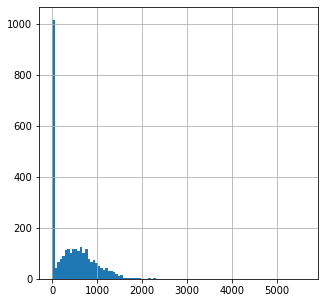

In [25]:
%matplotlib inline
df['BsmtFinSF1'].hist(bins=100, figsize=(5,5))
plt.show()

In [26]:
df1.isnull().sum().sum()

1459

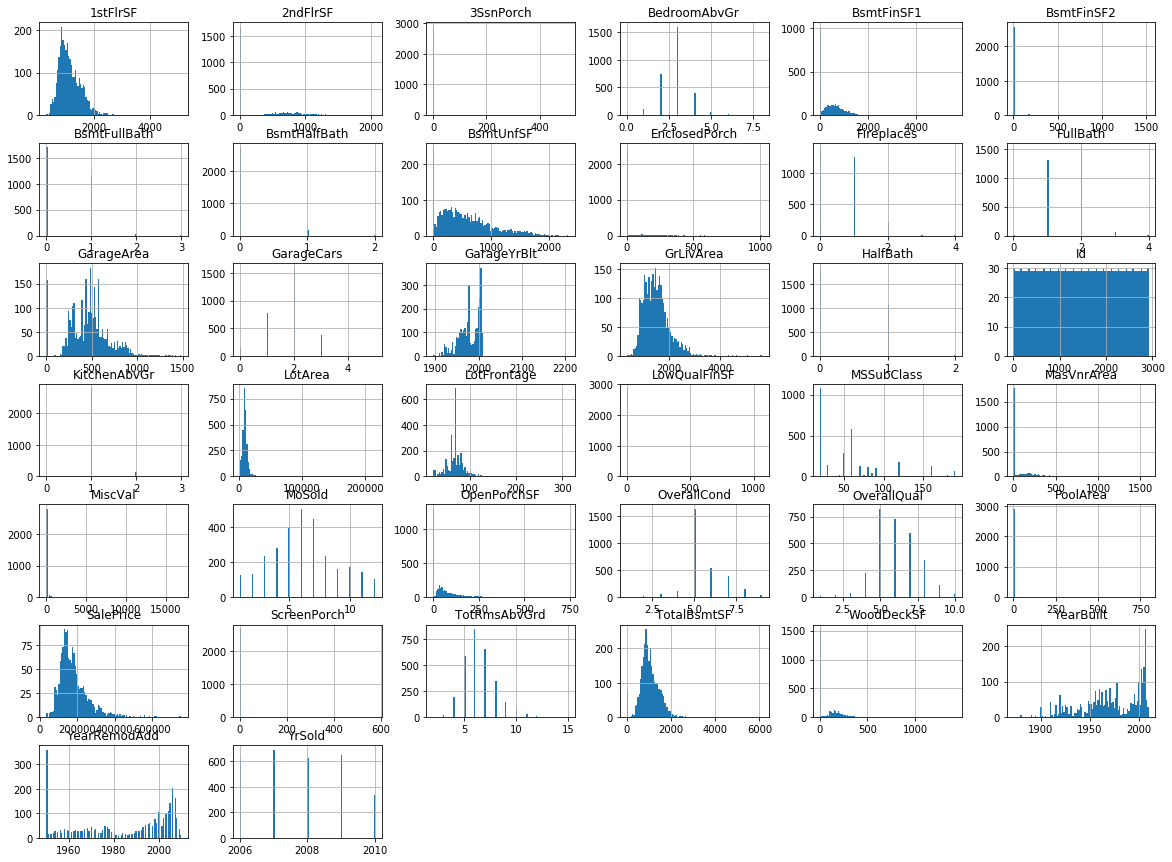

In [27]:
%matplotlib inline
df1.hist(bins=100, figsize=(20,15))
plt.show()

In [28]:
df1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,5,0,NaN,120,5,882.0,140,1961,1961,2010
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,6,0,NaN,0,6,1329.0,393,1958,1958,2010
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,5,0,NaN,0,6,928.0,212,1997,1998,2010
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,6,0,NaN,0,7,926.0,360,1998,1998,2010
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,8,0,NaN,144,5,1280.0,0,1992,1992,2010


In [29]:
df2.shape

(2919, 43)

In [30]:
df2.isnull().sum()

Alley            2721
BldgType            0
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
BsmtQual           81
CentralAir          0
Condition1          0
Condition2          0
Electrical          1
ExterCond           0
ExterQual           0
Exterior1st         1
Exterior2nd         1
Fence            2348
FireplaceQu      1420
Foundation          0
Functional          2
GarageCond        159
GarageFinish      159
GarageQual        159
GarageType        157
Heating             0
HeatingQC           0
HouseStyle          0
KitchenQual         1
LandContour         0
LandSlope           0
LotConfig           0
LotShape            0
MSZoning            4
MasVnrType         24
MiscFeature      2814
Neighborhood        0
PavedDrive          0
PoolQC           2909
RoofMatl            0
RoofStyle           0
SaleCondition       0
SaleType            1
Street              0
Utilities           2
dtype: int64

In [31]:
df2 = df2.drop(['Alley', 'Fence', 'MiscFeature', 'PoolQC'], axis = 1)

In [32]:
df2['BsmtCond'] = df2['BsmtCond'].fillna('No Basement')
df2['BsmtExposure'] = df2['BsmtExposure'].fillna('No Basement')
df2['BsmtFinType1'] = df2['BsmtFinType1'].fillna('No Basement')
df2['BsmtFinType2'] = df2['BsmtFinType2'].fillna('No Basement')
df2['BsmtQual'] = df2['BsmtQual'].fillna('No Basement')
df2['FireplaceQu'] = df2['FireplaceQu'].fillna('No Fireplace')
df2['GarageCond'] = df2['GarageCond'].fillna('No Garage')
df2['GarageFinish'] = df2['GarageFinish'].fillna('No Garage')
df2['GarageQual'] = df2['GarageQual'].fillna('No Garage')
df2['GarageType'] = df2['GarageType'].fillna('No Garage')

In [33]:
for column in df2:
    try:
        df2[column] = df2[column].fillna(df2[column].value_counts()[0])
    except:
        pass

In [34]:
df2.isnull().sum()

BldgType         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
BsmtQual         0
CentralAir       0
Condition1       0
Condition2       0
Electrical       0
ExterCond        0
ExterQual        0
Exterior1st      0
Exterior2nd      0
FireplaceQu      0
Foundation       0
Functional       0
GarageCond       0
GarageFinish     0
GarageQual       0
GarageType       0
Heating          0
HeatingQC        0
HouseStyle       0
KitchenQual      0
LandContour      0
LandSlope        0
LotConfig        0
LotShape         0
MSZoning         0
MasVnrType       0
Neighborhood     0
PavedDrive       0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SaleType         0
Street           0
Utilities        0
dtype: int64

In [35]:
#Replacing MSSubClass
MSSubClassin = [20,30,40,45,50,60,70,75,80,85,90,120,150,160,180,190]
MSSubClassout = ['1-STORY 1946 & NEWER ALL STYLES', '1-STORY 1945 & OLDER', '1-STORY W/FINISHED ATTIC ALL AGES', '1-1/2 STORY - UNFINISHED ALL AGES',
            '1-1/2 STORY FINISHED ALL AGES', '2-STORY 1946 & NEWER', '2-STORY 1945 & OLDER', '2-1/2 STORY ALL AGES', 'SPLIT OR MULTI-LEVEL',
             'SPLIT FOYER', 'DUPLEX - ALL STYLES AND AGES', '1-STORY PUD (Planned Unit Development) - 1946 & NEWER', '1-1/2 STORY PUD - ALL AGES',
              '2-STORY PUD - 1946 & NEWER', 'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER', '2 FAMILY CONVERSION - ALL STYLES AND AGES']

In [36]:
df1['MSSubClass'] = df1['MSSubClass'].replace(MSSubClassin, MSSubClassout)

In [37]:
df

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,896,0,0,NaN,2,1Fam,TA,No,468.0,144.0,...,WD,120,Pave,5,882.0,AllPub,140,1961,1961,2010
1,1329,0,0,NaN,3,1Fam,TA,No,923.0,0.0,...,WD,0,Pave,6,1329.0,AllPub,393,1958,1958,2010
2,928,701,0,NaN,3,1Fam,TA,No,791.0,0.0,...,WD,0,Pave,6,928.0,AllPub,212,1997,1998,2010
3,926,678,0,NaN,3,1Fam,TA,No,602.0,0.0,...,WD,0,Pave,7,926.0,AllPub,360,1998,1998,2010
4,1280,0,0,NaN,2,TwnhsE,TA,No,263.0,0.0,...,WD,144,Pave,5,1280.0,AllPub,0,1992,1992,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,NaN,3,1Fam,TA,No,0.0,0.0,...,WD,0,Pave,7,953.0,AllPub,0,1999,2000,2007
1456,2073,0,0,NaN,3,1Fam,TA,No,790.0,163.0,...,WD,0,Pave,7,1542.0,AllPub,349,1978,1988,2010
1457,1188,1152,0,NaN,4,1Fam,Gd,No,275.0,0.0,...,WD,0,Pave,9,1152.0,AllPub,0,1941,2006,2010
1458,1078,0,0,NaN,2,1Fam,TA,Mn,49.0,1029.0,...,WD,0,Pave,5,1078.0,AllPub,366,1950,1996,2010


In [38]:
df1 = pd.concat([df1, df2],axis=1)

In [39]:
df1 = pd.get_dummies(df1, drop_first=True)

In [40]:
df1.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,...,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Street_Pave,Utilities_AllPub,Utilities_NoSeWa
0,896,0,0,2,468.0,144.0,0.0,0.0,270.0,0,...,0,0,0,0,0,0,1,1,1,0
1,1329,0,0,3,923.0,0.0,0.0,0.0,406.0,0,...,0,0,0,0,0,0,1,1,1,0
2,928,701,0,3,791.0,0.0,0.0,0.0,137.0,0,...,0,0,0,0,0,0,1,1,1,0
3,926,678,0,3,602.0,0.0,0.0,0.0,324.0,0,...,0,0,0,0,0,0,1,1,1,0
4,1280,0,0,2,263.0,0.0,0.0,0.0,1017.0,0,...,0,0,0,0,0,0,1,1,1,0


In [41]:
df1.shape

(2919, 271)

In [42]:
new_train = df1[Trainingdatasize:]
new_test = df1[:Trainingdatasize]

In [43]:
new_test.isnull().sum().sum()

1459

In [44]:
new_train.isnull().sum().sum()

0

In [45]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd


def OptimalRegression(dataset, y_name):
    
    r = Ridge()
    l = Lasso()
    e = ElasticNet()
    et = ExtraTreeRegressor()
    gbr = GradientBoostingRegressor()
    
    x = dataset.drop(y_name,axis = 1) 
    y = dataset[y_name]
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.8, random_state=0)
    
    algos = [r, l, e, et, gbr]
    algo_names = ['Ridge', 'Lasso','ElasticNet','Extra Tree','Gradient Boost']
    
    result = pd.DataFrame(columns = ['Mean Squared Error', 'R2'], index = algo_names)
    
    meansquarederror = []
    r2 = []
    largest_r2 = 0
    bestmodel = 0
    
    for algo in algos:
        algo.fit(x_train,y_train)
        algo.predict(x_test)
        
        meansquarederror.append(mean_squared_error(y_test, algo.predict(x_test)))
        r2val = r2_score(y_test, algo.predict(x_test))
        r2.append(r2val)
        if(r2val > largest_r2):
            largest_r2 = r2val
            bestmodel = algo
        
    result['Mean Squared Error'] = meansquarederror
    result['R2'] = r2
    
    stats = result.sort_values('R2', ascending = False)
    
    return bestmodel, stats



In [46]:
model, stats = OptimalRegression(new_train,'SalePrice')
stats

,Mean Squared Error,R2
Gradient Boost,7.760990e+08,0.887617
Extra Tree,2.345513e+09,0.660359
Ridge,2.364991e+09,0.657538
ElasticNet,2.629497e+09,0.619236
Lasso,2.976194e+09,0.569033


In [47]:
new_test['SalePrice'] = model.predict(new_test.drop('SalePrice', axis=1))

In [48]:
out_df = new_test[['Id','SalePrice']]

In [49]:
out_df.head()

,Id,SalePrice
0,1461,120951.777514
1,1462,161209.242226
2,1463,190037.651930
3,1464,187708.663844
4,1465,198882.025488


In [50]:
out_df.to_csv("My_Prediction.csv",index = False)

In [51]:
ls

1533148642_test.csv
1533148642_train.csv
HackDay2.ipynb
My_Prediction.csv
README.md
data_description.txt*
house-prices-advanced-regression-techniques/
house-prices-advanced-regression-techniques.zip
sample_submission.csv*


In [52]:
out_df.shape

(1459, 2)